In [2]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('E:/cnn')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'E:\\cnn'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
# os.mkdir('training')

np.save('/data',data)
np.save('/target',labels)

In [7]:
data=np.load('/data.npy')
labels=np.load('/target.npy')

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [13]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [14]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test),callbacks=[tb_callback])

Epoch 1/20
  1/981 [..............................] - ETA: 0s - loss: 53.5177 - accuracy: 0.0312WARNING:tensorflow:From D:\Anaconda\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
981/981 [==============================] - 100s 102ms/step - loss: 1.7232 - accuracy: 0.5674 - val_loss: 0.2834 - val_accuracy: 0.9277
Epoch 2/20
981/981 [==============================] - 95s 97ms/step - loss: 0.4434 - accuracy: 0.8731 - val_loss: 0.1171 - val_accuracy: 0.9691
Epoch 3/20
981/981 [==============================] - 93s 95ms/step - loss: 0.2832 - accuracy: 0.9212 - val_loss: 0.0935 - val_accuracy: 0.9751
Epoch 4/20
981/981 [==============================] - 95s 97ms/step - loss: 0.2398 - accuracy: 0.9329 - val_loss: 0.1082 - val_accuracy: 0.9760
Epoch 5/20
981/981 [==============================] - 92s 94ms/step 

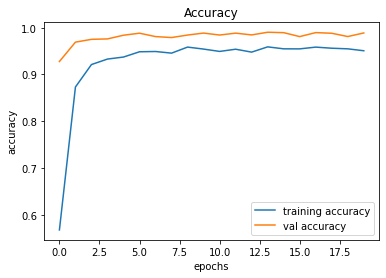

In [15]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

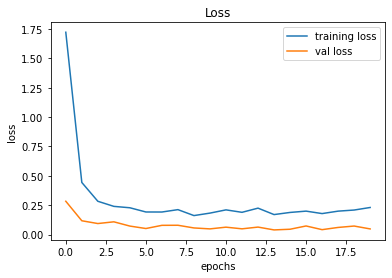

In [16]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [18]:
X_test, label = testing('Test.csv')

In [19]:
Y_pred = model.predict_classes(X_test)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9625494853523358


In [21]:
model.save("/TSR.h5")

In [22]:
import os
os.chdir(r'D:\Image Classification')
from keras.models import load_model
model = load_model('/TSR.h5')

In [23]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons'
          }

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Bumpy road


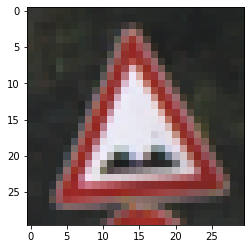

In [25]:
plot,prediction = test_on_img(r'D:\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Slippery road


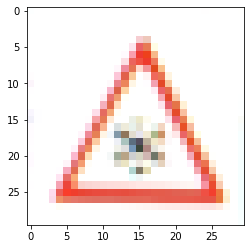

In [26]:
plot,prediction = test_on_img(r'D:\Test\00501.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Priority road


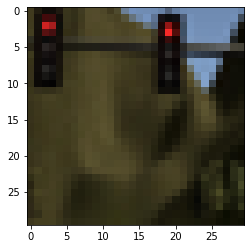

In [27]:
plot,prediction = test_on_img(r'D:\Image Classification\Test\out02472.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [28]:
print(classification_report(label, Y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.98      0.99      0.98       720
           2       0.99      0.99      0.99       750
           3       0.93      0.95      0.94       450
           4       1.00      0.97      0.98       660
           5       0.93      0.96      0.94       630
           6       0.98      0.83      0.90       150
           7       0.99      0.97      0.98       450
           8       0.96      0.97      0.96       450
           9       0.95      0.99      0.97       480
          10       0.98      0.98      0.98       660
          11       0.97      0.95      0.96       420
          12       0.99      0.96      0.98       690
          13       1.00      0.99      1.00       720
          14       1.00      0.99      0.99       270
          15       0.96      1.00      0.98       210
          16       1.00      0.99      1.00       150
          17       1.00    